## Question 1

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [4]:
weather_df['temp_diff'] = weather_df['temperature'] - weather_df['apparenttemperature']

In [5]:
weather_df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary,temp_diff
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2.083333
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2.127778
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0.000000
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2.344444
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,1.777778
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.,2.111111
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.,2.211111
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.,2.244444
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.,0.000000
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.,0.000000


In [6]:
# Y is the target variable
Y = weather_df['temp_diff']
# X is the feature set
X = weather_df[['humidity','windspeed']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [3.02918594 0.11929075]

Intercept: 
 -2.4381054151876933


In [7]:
X_two = sm.add_constant(X)

results = sm.OLS(Y, X_two).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              temp_diff   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:58:03   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4381      0.021   -115.948      0.000      -2.479      -2.397
humidity       3.0292      0.024    126.479      0.000       2.982       3.076
windspeed      0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both the R squared and adjusted R-squared values are 0.288, which means this model does a very poor job of predicting temp_diff. This is definitely not satisfactory.

In [8]:
weather_df['hum_wspeed'] = weather_df['humidity'] * weather_df['windspeed']

In [9]:
# Y is the target variable
Y = weather_df['temp_diff']
# X is the feature set
X = weather_df[['humidity','windspeed', 'hum_wspeed']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-0.17751219 -0.09048213  0.29711946]

Intercept: 
 -0.08393631009782698


In [10]:
X_two = sm.add_constant(X)

results = sm.OLS(Y, X_two).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              temp_diff   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:58:03   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0839      0.033     -2.511      0.012      -0.149      -0.018
humidity      -0.1775      0.043     -4.133      0.000      -0.262      -0.093
windspeed     -0.0905      0.002    -36.797      0.000      -0.095      -0.086
hum_wspeed     0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both R-squared terms rose to 0.341, which is definitely an improvement. However, this is still much too low to be considered a satisfactory model.

In [11]:
# Y is the target variable
Y = weather_df['temp_diff']
# X is the feature set
X = weather_df[['humidity','windspeed', 'visibility']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 2.60664109  0.11990113 -0.05398318]

Intercept: 
 -1.5755946860023264


In [12]:
X_two = sm.add_constant(X)

results = sm.OLS(Y, X_two).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              temp_diff   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:58:04   Log-Likelihood:            -1.6938e+05
No. Observations:               96453   AIC:                         3.388e+05
Df Residuals:                   96449   BIC:                         3.388e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5756      0.028    -56.605      0.000      -1.630      -1.521
humidity       2.6066      0.025    102.784      0.000       2.557       2.656
windspeed      0.1199      0.001    179.014      0.000       0.119       0.121
visibility    -0.0540      0.001    -46.614      0.000      -0.056      -0.052
==============================================================================
Omnibus:                     3833.895   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.022
Skew:                           0.459   Prob(JB):                         0.00
Kurtosis:                       3.545   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared improved to 0.304 from 0.288 and adjusted R-squared improved to 0.303 from 0.288 as a result of adding the visibility feature to the first model. Judging from R-squared values adding the interaction between humidity and wind speed did more to improve the model than adding visibility.

If we decide to use AIC or BIC to select the best model we get the same answer as when using R-squared as the ranking criteria: the second model is the best because it has the highest R-squared and adjusted R-squared and the lowest AIC and BIC.

## Question 2

In [13]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hp_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [16]:
hp_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


### Model 1

In [14]:
# Y is the target variable
Y2 = hp_df['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X2 = hp_df[['grlivarea','overallqual']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X2, Y2)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [   55.86222591 32849.04744063]

Intercept: 
 -104092.66963598129


In [15]:
X2_two = sm.add_constant(X2)

results = sm.OLS(Y2, X2_two).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1820.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:58:18   Log-Likelihood:                -17630.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1457   BIC:                         3.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.041e+05   5045.372    -20.631      0.000   -1.14e+05   -9.42e+04
grlivarea      55.8622      2.630     21.242      0.000      50.704      61.021
overallqual  3.285e+04    999.198     32.875      0.000    3.09e+04    3.48e+04
==============================================================================
Omnibus:                      341.985   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8725.150
Skew:                           0.469   Prob(JB):                         0.00
Kurtosis:                      14.939   Cond. No.                     7.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared term is 0.714, meaning this model explains 71.4% of the variance in saleprice. In my opinion this is a useful model, but I would definitely want more accuracy if I'm going to use this model to make decisions. Therefore, I would call this result semi-satisfactory. The F test is not useful for evaluating this stand alone model, but we will use it later to compare models. AIC and BIC are also better used to compare models, rather than evaluate a single model, so I won't make any inferences from those values yet either.

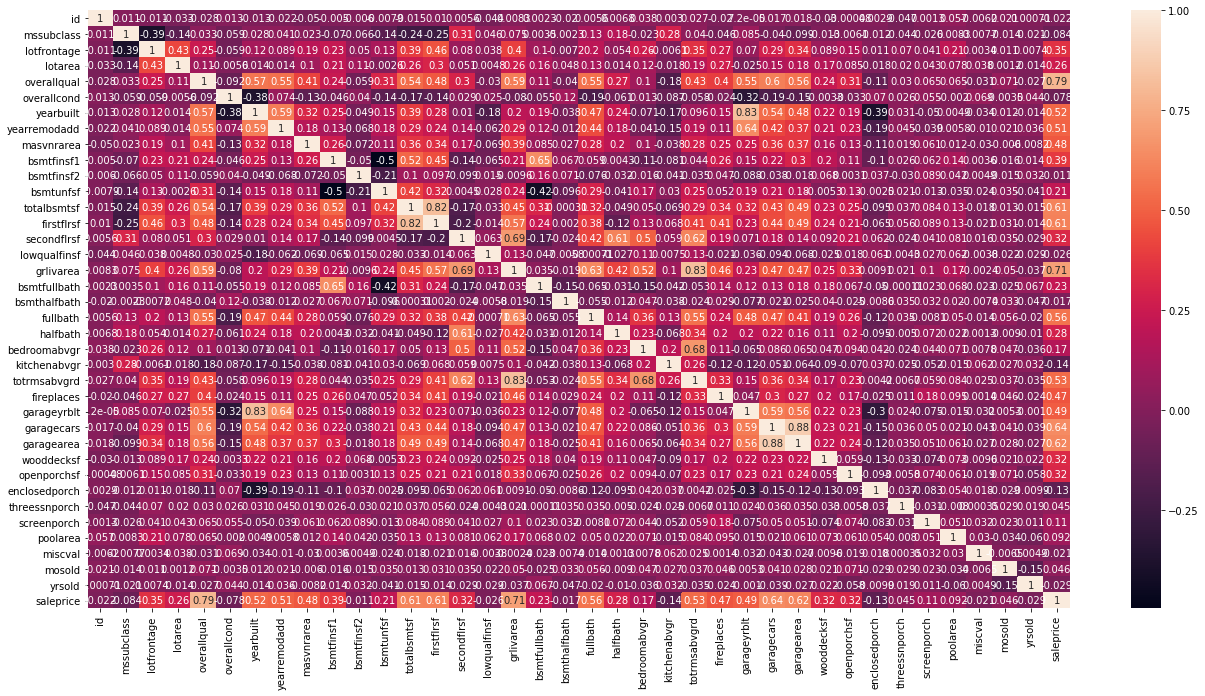

In [21]:
plt.figure(figsize=(22,11))
sns.heatmap(hp_df.corr(), annot=True)

### Model 2

In [22]:
# Y is the target variable
Y2 = hp_df['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X2 = hp_df[['grlivarea','overallqual', 'garagecars', 'fullbath']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X2, Y2)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [   51.22111853 27199.82026355 21420.37943466 -1174.62788985]

Intercept: 
 -98616.90167012779


In [23]:
X2_two = sm.add_constant(X2)

results = sm.OLS(Y2, X2_two).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1030.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:31:24   Log-Likelihood:                -17563.
No. Observations:                1460   AIC:                         3.514e+04
Df Residuals:                    1455   BIC:                         3.516e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.862e+04   4868.062    -20.258      0.000   -1.08e+05   -8.91e+04
grlivarea      51.2211      2.829     18.104      0.000      45.671      56.771
overallqual   2.72e+04   1093.230     24.880      0.000    2.51e+04    2.93e+04
garagecars   2.142e+04   1827.759     11.719      0.000    1.78e+04     2.5e+04
fullbath    -1174.6279   2621.443     -0.448      0.654   -6316.839    3967.583
==============================================================================
Omnibus:                      417.368   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9692.730
Skew:                           0.774   Prob(JB):                         0.00
Kurtosis:                      15.527   Cond. No.                     7.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3

In [33]:
# Y is the target variable
Y3 = hp_df['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X3 = hp_df[['grlivarea','overallqual', 'garagecars', 'fullbath', 'fireplaces', 'yearbuilt']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X3, Y3)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [   56.299861   21967.02491573 15661.70344178 -7300.40993179
 10775.0416913    424.70974902]

Intercept: 
 -898455.4293239218


In [34]:
X3_two = sm.add_constant(X3)

results = sm.OLS(Y3, X3_two).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     756.9
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:47:40   Log-Likelihood:                -17509.
No. Observations:                1460   AIC:                         3.503e+04
Df Residuals:                    1453   BIC:                         3.507e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.985e+05   9.13e+04     -9.846      0.000   -1.08e+06   -7.19e+05
grlivarea      56.2999      3.113     18.086      0.000      50.193      62.406
overallqual  2.197e+04   1171.412     18.753      0.000    1.97e+04    2.43e+04
garagecars   1.566e+04   1861.507      8.413      0.000     1.2e+04    1.93e+04
fullbath    -7300.4099   2707.560     -2.696      0.007   -1.26e+04   -1989.266
fireplaces   1.078e+04   1838.608      5.860      0.000    7168.433    1.44e+04
yearbuilt     424.7097     48.051      8.839      0.000     330.453     518.966
==============================================================================
Omnibus:                      447.368   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16284.619
Skew:                           0.731   Prob(JB):                         0.00
Kurtosis:                      19.296   Cond. No.                     2.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 4

In [37]:
# Y is the target variable
Y3 = hp_df['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X3 = hp_df[['grlivarea','overallqual', 'garagecars', 'fullbath', 'fireplaces', 'yearbuilt', 'yearremodadd', 'totrmsabvgrd']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X3, Y3)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [   58.64977899 20526.59671243 15617.48454101 -8280.94448954
 11563.95865355   344.45117267   298.66280008  -910.88281567]

Intercept: 
 -1320759.3485210259


In [38]:
X3_two = sm.add_constant(X3)

results = sm.OLS(Y3, X3_two).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     578.0
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:51:55   Log-Likelihood:                -17499.
No. Observations:                1460   AIC:                         3.502e+04
Df Residuals:                    1451   BIC:                         3.506e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.321e+06   1.32e+05     -9.971      0.000   -1.58e+06   -1.06e+06
grlivarea       58.6498      4.234     13.851      0.000      50.344      66.956
overallqual   2.053e+04   1204.714     17.039      0.000    1.82e+04    2.29e+04
garagecars    1.562e+04   1850.752      8.438      0.000     1.2e+04    1.92e+04
fullbath     -8280.9445   2734.368     -3.028      0.003   -1.36e+04   -2917.208
fireplaces    1.156e+04   1842.759      6.275      0.000    7949.203    1.52e+04
yearbuilt      344.4512     50.817      6.778      0.000     244.768     444.135
yearremodadd   298.6628     65.599      4.553      0.000     169.984     427.341
totrmsabvgrd  -910.8828   1141.586     -0.798      0.425   -3150.218    1328.453
==============================================================================
Omnibus:                      462.635   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18505.551
Skew:                           0.753   Prob(JB):                         0.00
Kurtosis:                      20.376   Cond. No.                     4.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By both R-squared and adjusted R-squared each successive model was an improvement upon the others by adding more features. By F-statistic, AIC, and BIC each successive model was also an improvement upon the others. However, model 4 was only a very slight improvement upon Model 3 for AIC and BIC, so we are probably very near the point that adding more features to the model would begin to be counter-productive.